#### Anomaly detection

In [46]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
data = loadmat('ex8data1.mat')  
X = data['X']

#Amount of data 
X.shape

(307, 2)

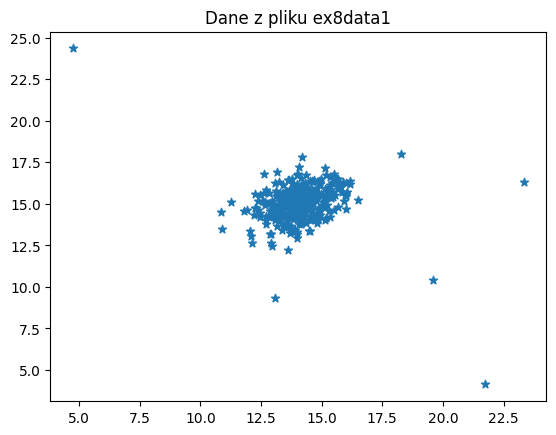

In [47]:
plt.scatter(X[:, 0], X[:, 1], marker='*')
plt.title('Dane z pliku ex8data1')
plt.show()

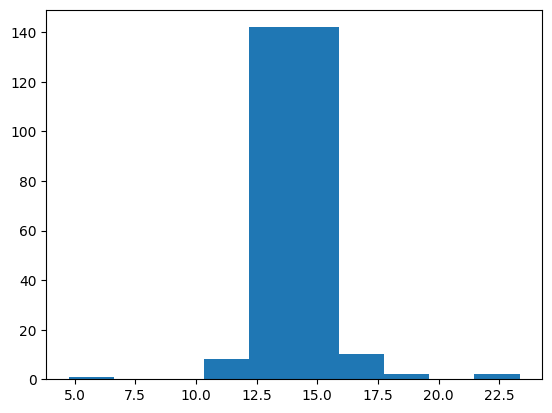

In [48]:
plt.hist(X[:, 0])
plt.show()

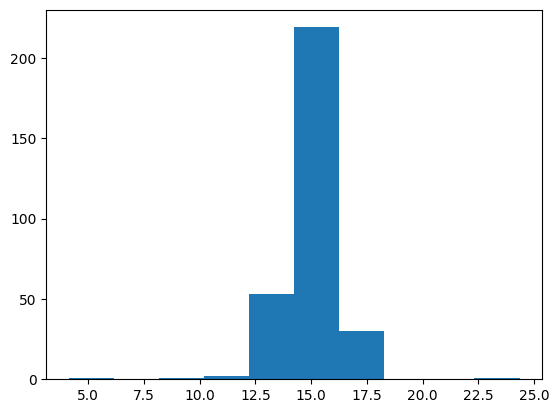

In [49]:
plt.hist(X[:, 1])
plt.show()

#### Gaussian distribution

In [50]:
def estimate_gaussian(X):  
    mu = np.mean(X)
    sigma = np.std(X)
    return mu, sigma

mu0, sigma0 = estimate_gaussian(X[:, 0])
mu1, sigma1 = estimate_gaussian(X[:, 1])

print(mu0, sigma0)
print(mu1, sigma1)

14.112225783945592 1.353747174879607
14.99771050813621 1.3075723042450764


#### Calculate probability

In [51]:
Xval = data['Xval']  
yval = data['yval']

print(Xval.shape, yval.shape)

(307, 2) (307, 1)


In [52]:
from scipy import stats

p_X = np.zeros((X.shape[0], X.shape[1]))

p_X0 = stats.norm.pdf(X[:,0], loc=mu0, scale=np.sqrt(sigma0))
p_X1 = stats.norm.pdf(X[:,1], loc=mu1, scale=np.sqrt(sigma1))

p_X[:, 0] = p_X0
p_X[:, 1] = p_X1

In [53]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))

pval[:, 0] = stats.norm.pdf(Xval[:,0], loc=mu0, scale=np.sqrt(sigma0))
pval[:, 1] = stats.norm.pdf(Xval[:,1], loc=mu1, scale=np.sqrt(sigma1))

print(f'{pval[:,1].min()} | {pval[:, 1].max()}')

1.6507045878771996e-16 | 0.3488807896098155


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

#### Selecting the treshold

In [58]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval):
    selected_threshold = 0
    f1_result = 0

    for i in np.linspace(pval.min(), pval.max(), 10000).tolist():
        t = pval <= i
        y = np.logical_or(t[:,0], t[:,1])
        f1 = f1_score(yval, y)

        if f1 > selected_threshold:
            f1_result = f1
            selected_threshold = i

    return selected_threshold, f1_result

treshold, f1 = select_threshold(pval, yval)

print(f'Best treshold: {treshold}')
print(f'Best f1_score {f1}')

Best treshold: 0.1642346111304532
Best f1_score 0.16470588235294117


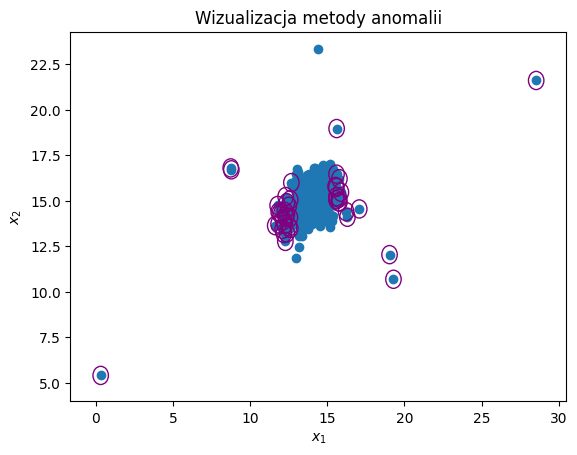

In [55]:
anomaly_prediction = (pval[:,0] < treshold).astype(int)

figure, ax = plt.subplots()
ax.scatter(Xval[:,0], Xval[:,1])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
for n, i in enumerate(anomaly_prediction):
    if i == 1:
        circle = plt.Circle(Xval[n], 0.5, color='purple', fill=False)
        ax.add_patch(circle)
plt.title('Wizualizacja metody anomalii')
plt.show()

###### Prawdopodobnie coś jest zaimplementowanie błędnie bo kółkiem zaznacza zbyt dużo niewłaściwyche elementów.